In [1]:
from pathlib import Path

import dask.dataframe as dd
from dask import delayed

data_root = Path("../data/taxi-small")
trips_path = data_root / "trips.parq"
fares_path = data_root / "fares.parq"

__Exercise__ 

Read both the trips and fares datasets as Dask dataframes called `trips` and `fares`.

In [2]:
trips = dd.read_parquet(trips_path)
fares = dd.read_parquet(fares_path)

__Exercise__

How many trips are there in the dataset?

In [3]:
len(trips)

349278

__Exercise__: 

What percentage of trips have only 1 passenger?

__Exercise__: 

What date has the fewest trips?

In [4]:
trips_daily = trips.resample("1D").size().compute()

In [5]:
trips_daily.idxmin()

Timestamp('2013-12-25 00:00:00', freq='D')

__Exercise__:

Merge the `trips` and `fares` datasets on the index (`pickup_datetime`) and `medallion_id`. Persist the result to a variable `taxi`. 

Does this join require a shuffle?

In [6]:
cols = ["pickup_datetime", "medallion_id", "hack_license_id"]
taxi = dd.merge(trips, fares, on=cols).persist()

Visualize the task graph for `taxi`. How many partitions does it have?

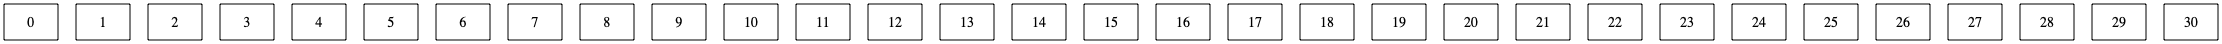

In [7]:
taxi.visualize()

__Exercise__

What were the top 10 medallions by total money earned (`total_amount`) and how many trips did they make over the entire period?

In [8]:
totals = taxi.groupby("hack_license_id")["total_amount"]\
    .agg(["sum", "count"]).compute()

In [9]:
totals.sort_values("sum", ascending=False)[:10]

,sum,count
hack_license_id,,
611,2225.92,16
5874,659.15,9
16047,649.15,40
12628,641.86,11
6776,641.58,44
12703,630.53,12
18092,621.47,33
25541,593.06,26
21620,577.33,34
